# Tensorflow neural network regression :

Special example : object detection (predict coordinates of the box)

- Input layer shape (Depend on data we have)
- Hidden layers (Depend on the problem)
- Neurons per hidden layer (Depend on the problem 10~100 ?)
- Output layer shape (Depending on the problem, data we want to have at the end)
- Hidden activation (ReLU usually)
- Output activation (None, ReLU, Tanh,...)
- Loss function (MSE, MAE, Root version,...)
- Optimizer (SGD, Adam,...)

In [ ]:
import tensorflow as tf
print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt

2.17.1


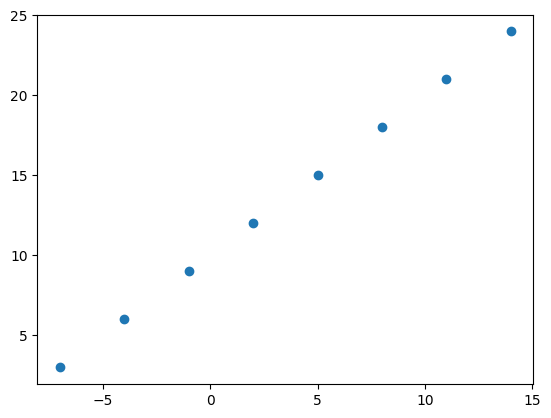

In [ ]:
# Creating data to view and fit :
X=np.array([-7.,-4.,-1.,2.,5.,8.,11.,14.])
y= np.array([3.,6.,9.,12.,15.,18.,21.,24.])

plt.scatter(X,y)

## Input and output shapes :

In [ ]:
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape, output_shape, X[0].ndim, y[0].ndim # Scalar have dim = 0 so empty shape

((), (), 0, 0)

In [ ]:
X = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y),dtype=tf.float32)

X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape=X[0].shape
output_shape=y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

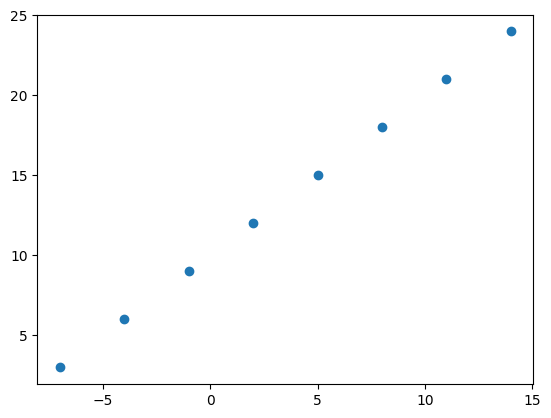

In [ ]:
plt.scatter(X,y)

## Modelling with tensorflow :

1 - Creating a model : input, output, hidden layers

2 - Compiling a model : loss, optimizer, metric

3 - Fitting a model : learn the pattern

In [ ]:
import random
tf.random.set_seed(42)
random.seed(42) # without it it's not deterministic result

# 1 - Create a model with tf.keras.Sequential :
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

""" # An other way of doing thing
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
"""

# 2 - Compile model :
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3 - Fit model :
model.fit(tf.expand_dims(X,axis=-1),y, epochs=5) # Error with X, need to add a dimension at the end (8,) -> (8,1)

Epoch 1/5


KeyboardInterrupt: 

In [ ]:
model.predict(tf.constant([17.0])) # Bad pred, hoped to have 27

## Improving model :

- Add more layers, more hidden units, change activation function

- Change optimization function, learning rate

- More epochs, more data


### First try :

In [ ]:
tf.random.set_seed(42)
random.seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100) # Train for longer this time

In [ ]:
# Predict :
model.predict(tf.constant([17.])) # Still not good

### Second try :

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

In [ ]:
model.predict(tf.constant([17.])) # No, maybe overfitting ?

### Third try :

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              metrics=["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

In [ ]:
model.predict(tf.constant([17.])) # Looking good; Learning rate was the solution (mostly)

## Evaluating a model :


In [ ]:
X = tf.range(-100,100,4)
y = X + 10
plt.scatter(X,y)

In [ ]:
# Train/test split :
X_train = X[:int(0.8*len(X))]
y_train = y[:int(0.8*len(X))]

X_test = X[int(0.8*len(X)):]
y_test = y[int(0.8*len(X)):]

len(X), len(X_train), len(X_test)

In [ ]:
plt.scatter(X_train,y_train,color='b',label='Train')
plt.scatter(X_test, y_test,color='g',label='Test')
plt.legend();

### Model creation :

In [ ]:
tf.random.set_seed(42)
random.seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# model.summary() # Doesn't work !

model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)

In [ ]:
tf.random.set_seed(42)
random.seed(42)

model = tf.keras.Sequential([
    # tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(units=100,input_shape=[1],activation='relu'),
    tf.keras.layers.Dense(units=100,activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

model.summary()

model.fit(X_train,y_train,epochs=100, verbose=0, batch_size=None)

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

## Visualizing model's predictions :

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred) :

  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c='b',label="Train")
  plt.scatter(test_data,test_labels,c='g',label='Test')
  plt.scatter(test_data,predictions,c='r',label='Preds')
  plt.legend();

In [ ]:
plot_predictions()

## Evaluate with regression evaluation metrics :

- MAE : tf.keras.losses.MAE() or tf.metrics.mean_absolute_error()

- MSE : tf.keras.losses.MSE() or tf.metrics.mean_squared_error()

- Huber : Combination of MSE and MAE, less sensitive to outlisers than MSE. tf.keras.losses.Huber()

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
# Calculate MAE :
tf.keras.losses.MAE(y_test,tf.squeeze(y_pred)) # Squeeze for shape

In [ ]:
# Calculate MSE :
tf.keras.losses.MSE(y_test,tf.squeeze(y_pred)) # Squeeze for shape

In [ ]:
def mae(y_true, y_pred) :
  return tf.keras.metrics.MAE(y_true,tf.squeeze(y_pred))

def mse(y_true, y_pred) :
  return tf.keras.metrics.MSE(y_true,tf.squeeze(y_pred))

## Running experiments to improve our model again :

In [ ]:
X_train, y_train

### Model_1 :
- 1 layers, 1 hidden unit, 100 epochs

In [ ]:
tf.random.set_seed(42)
random.seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)

In [ ]:
# Make and plot preds for model_1 :
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate metrics:
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

### Model_2 :
- 2 layers Dense, 100 epochs

In [ ]:
tf.random.set_seed(42)
random.seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)

In [ ]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test,y_preds_2)
mae_2,mse_2

### Model_3 :
- 2 layers, 500 epochs

In [ ]:
tf.random.set_seed(42)
random.seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500,verbose=0)

In [ ]:
y_preds_3=model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
mae_3=mae(y_test,y_preds_3)
mse_3=mse(y_test,y_preds_3)
mae_3,mse_3

## Comparing the results of our experiments

In [ ]:
import pandas as pd

model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],["model_2",mae_2.numpy(),mse_2.numpy()],["model_3",mae_3.numpy(),mse_3.numpy()]]

all_res = pd.DataFrame(model_results,columns=['model','mae','mse'])
all_res

In [ ]:
model_1.summary() # The best one here.

## Saving & loading our models :

Two main formats to save our models to :

- The SavedModel format (default)
- HDF5 format

In [ ]:
model_1.save("best_model_reg.keras")

In [ ]:
model_loaded=tf.keras.models.load_model("/content/best_model_reg.keras")

In [ ]:
# Checking the architecture :
model_loaded.summary()
model_1.summary()

In [ ]:
# Compare predictions:
model_1_preds = model_1.predict(X_test)
model_loaded_preds = model_loaded.predict(X_test)
model_1_preds == model_loaded_preds, mae(y_test,model_1_preds) == mae(y_test, model_loaded_preds)

## Download a model from Colab using code :

In [ ]:
# From colab to personal computer
from google.colab import files
files.download("/content/best_model_reg.keras")

In [ ]:
# From colab to google drive
!cp /content/best_model_reg.keras /content/drive/MyDrive

# Medical Cost Personal Datasets :

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import data :

In [ ]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# One hot encode our categorical features :
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [ ]:
X = insurance_one_hot.drop('charges',axis=1)
y= insurance_one_hot['charges']
insurance_one_hot.shape, X.shape, y.shape

((1338, 12), (1338, 11), (1338,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

len(X), len(X_train), len(X_test)

(1338, 1070, 268)

## Create model :

In [ ]:
tf.random.set_seed(42)
random.seed(42)

insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.MAE,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

insurance_model.fit(X_train,y_train,epochs=100,verbose=0)

In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6154.5845 - mae: 6154.5845  


[5948.37158203125, 5948.37158203125]

In [ ]:
y_train.mean(), y_train.median() # Very wrong model !

(13346.089736364485, 9575.4421)

## Improve model :

Early stopping callback : epoch = inf and stop the training when the metric doesn't improve for a certain number of epoch

### Model_2 :

In [ ]:
tf.random.set_seed(42)
random.seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.MAE,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

insurance_model_2.fit(X_train,y_train,epochs=100,verbose=0)

In [ ]:
insurance_model_2.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4963.4180 - mae: 4963.4180  


[4819.01953125, 4819.01953125]

### Model_3 :

In [ ]:
tf.random.set_seed(42)
random.seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.MAE,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

history = insurance_model_3.fit(X_train,y_train,epochs=200,verbose=0)

In [ ]:
insurance_model_3.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3467.5400 - mae: 3467.5400  


[3402.621826171875, 3402.621826171875]

Text(0.5, 0, 'epochs')

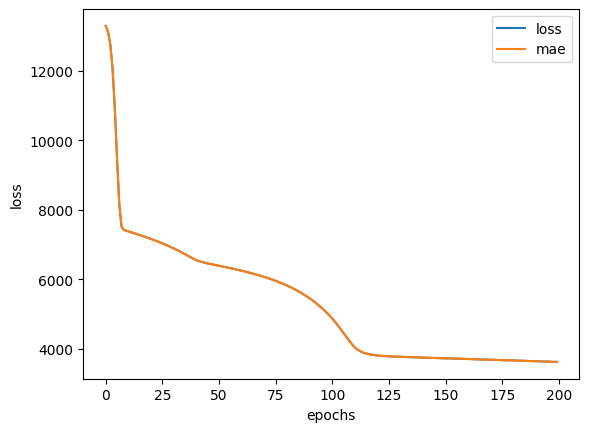

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

## Preprocessing data (normalization & standardization) :

- Normalization : keep the original distribution while converting values to [0,1] (MinMaxScaler)
  
  => good with neural networks

- Standardization : (x-mean)/std (StandardScaler)

  => Transform a feature to a distribution close to normal one & reduces the effect of outliers

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

insurance=pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi','children']), # Turn the values in those columns btw [0,1]
    (OneHotEncoder(handle_unknown='ignore'), ['sex','smoker','region'])
)

X = insurance.drop('charges',axis=1)
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train.iloc[1]

(age                47
 sex            female
 bmi             24.32
 children            0
 smoker             no
 region      northeast
 Name: 1285, dtype: object,
 None,
 array([0.63043478, 0.22491256, 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ]))

In [ ]:
X_train_normal[1]

array([0.63043478, 0.22491256, 0.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

In [ ]:
# Build model for normalized data :

tf.random.set_seed(42)
random.seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.MAE,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

insurance_model_4.fit(X_train_normal,y_train,epochs=200,verbose=0)

In [ ]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3213.7859 - mae: 3213.7859


[3160.944580078125, 3160.944580078125]